In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd

data = pd.read_csv("cumulative_allele_counts.tab", sep="\t",
                  names=["sample","sing","double","poly","pop"])
data = data[(data["sing"]+data["double"]+data["poly"])>0]
data

Populating the interactive namespace from numpy and matplotlib


,sample,sing,double,poly,pop
0,NA06984,3386,10789,0,CEU
1,NA06985,3315,1740,11063,CEU
2,NA06986,3419,1607,12370,CEU
3,NA06989,3531,1581,13239,CEU
4,NA06991,3213,1668,13893,CEU
...,...,...,...,...,...
3545,ZR043,14589,8094,62364,Zambia
3546,ZR044,14587,8101,62368,Zambia
3547,ZR046,14587,8098,62377,Zambia
3548,ZR047,14587,8102,62383,Zambia


In [2]:
eur_count = data[data["pop"].isin(["CEU","FIN","GBR","IBS","TSI"])].shape[0]
eas_count = data[data["pop"].isin(["CDX","CHB","CHS","JPT","KHV"])].shape[0]
sas_count = data[data["pop"].isin(["BEB","GIH","ITU","PJL","STU"])].shape[0]
amr_count = data[data["pop"].isin(["CLM","MXL","PEL","PUR"])].shape[0]
afr_count = data[data["pop"].isin(["ACB","ASW","ESN","GWD","LWK","MSL","YRI"])].shape[0]
h3afr_count = data[data["pop"].isin(["Benin","Botswana","Burkina_Faso-Ghana","Cameroon_24", \
                                   "Cameroon_26", "Mali","Nigeria","Zambi"])].shape[0]

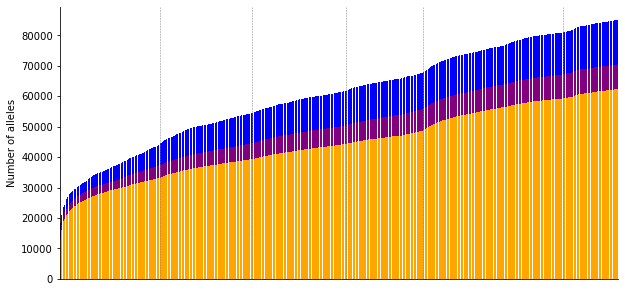

In [3]:
fig = plt.figure()
fig.set_size_inches((10, 5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.bar(range(data.shape[0]), data["poly"], color="orange");
ax.bar(range(data.shape[0]), data["double"], bottom=data["poly"], color="purple");
ax.bar(range(data.shape[0]), data["sing"], bottom=data["poly"]+data["double"], color="blue");
ax.axvline(x=eur_count, linestyle="dashed",color="gray",linewidth=0.5)
ax.axvline(x=eur_count+eas_count, linestyle="dashed",color="gray",linewidth=0.5)
ax.axvline(x=eur_count+eas_count+sas_count, linestyle="dashed",color="gray",linewidth=0.5)
ax.axvline(x=eur_count+eas_count+sas_count+amr_count, linestyle="dashed",color="gray",linewidth=0.5)
ax.axvline(x=eur_count+eas_count+sas_count+amr_count+afr_count, linestyle="dashed",color="gray",linewidth=0.5)
ax.set_xlim(0, data.shape[0]);
ax.set_xticks([])
ax.set_ylabel("Number of alleles")
fig.savefig("cumulative_variation_plot.pdf")